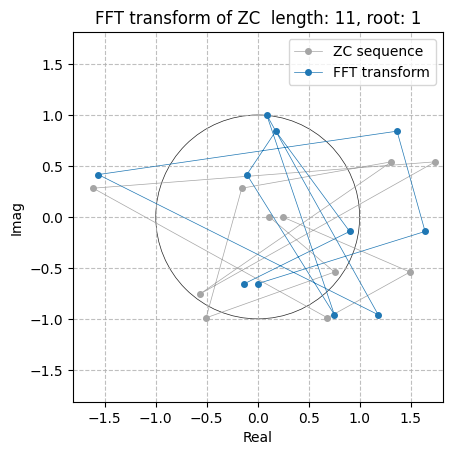

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import sdr

# Apply fft to ZC squence
# Params: N - length, r1 - root index of ZC sequence
N = 11
N_sf = 12
r1 = 1

# Dispersion of noise
SIGMA = 1

# Generate ZC
S1 = sdr.zadoff_chu_sequence(N, r1)
SEQUENCE_1 = S1

# For ZC sequence extend uncomment this:
# Z1 = np.zeros(N_sf)
# Z1 = S1[np.arange(N_sf) % N]
# SEQUENCE_1 = Z1

L = len(SEQUENCE_1)

# Generate noise
noise = SIGMA * np.random.uniform(-1, 1, L)

# Appling FFT to ZC sequence 
FFT_ZC = np.fft.fft(SEQUENCE_1 / np.sqrt(L))

plt.figure()
sdr.plot.constellation(SEQUENCE_1 + noise, color='#a5a5a5', linestyle="-", linewidth=0.5, markersize=8, label='ZC sequence')
sdr.plot.constellation(FFT_ZC + noise, linestyle="-", linewidth=0.5, markersize=8, label='FFT transform')
circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
plt.gca().add_artist(circle)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.legend(loc='upper right')
plt.title(f"FFT transform of ZC  length: {L}, root: {r1}")
plt.show()

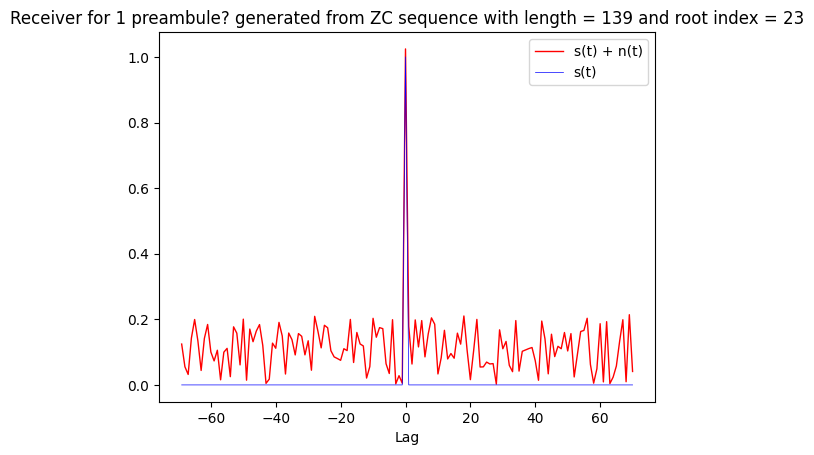

In [88]:
import numpy as np
from matplotlib import pyplot as plt
import sdr

# Apply fft to ZC squence
# Params: N - length, r1 - root index of ZC sequence
N = 139
N_sf = 140
# Root index of sequence
r1 = 23

# Dispersion of noise
SIGMA = 30

# Generate ZC
S1 = sdr.zadoff_chu_sequence(N, r1)
SEQUENCE_1 = S1
L = len(SEQUENCE_1)
noise = SIGMA * np.random.uniform(0, 1, L + 1)

# For ZC sequence extend uncomment this:
# Z1 = np.zeros(N_sf)
# Z1 = S1[np.arange(N_sf) % N]
# SEQUENCE_1 = Z1
# L = len(SEQUENCE_1)
# noise = SIGMA * np.random.uniform(-1, 1, L + 1)


xcorr = np.correlate(np.roll(np.tile(SEQUENCE_1, 2), -N//2), SEQUENCE_1, mode="valid")
lag = np.arange(-N//2 + 1, N//2 + 2)

plt.figure()
plt.plot(lag, (np.abs(xcorr) + noise) / L, label='s(t) + n(t)', color='r', linewidth=1, markersize=3)
plt.plot(lag, np.abs(xcorr) / L, label='s(t)', color='b', linewidth=0.5, markersize=3)
plt.xlabel("Lag")
plt.title(f"Receiver for 1 preambule? generated from ZC sequence with length = {L} and root index = {r1}")
plt.legend(loc='upper right')
plt.show()

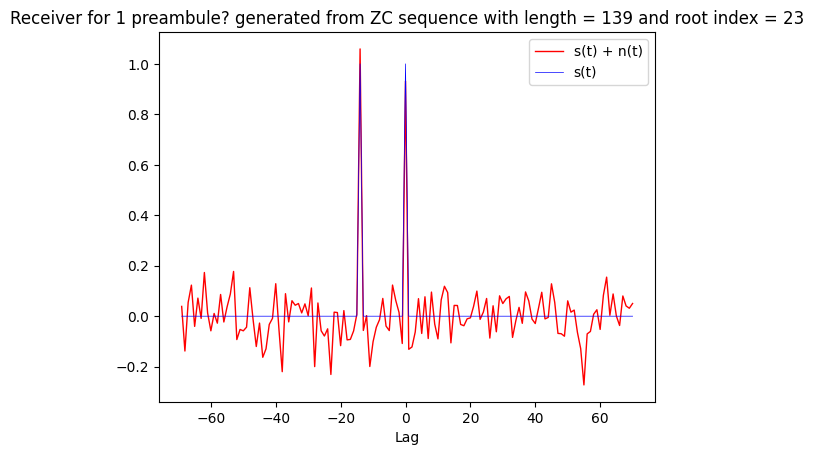

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import sdr

# Apply fft to ZC squence
# Params: N - length, r1 - root index of ZC sequence
N = 139
N_sf = 140
# Root index of sequence
r1 = 23

# Shift for generate second preambule
SHIFT = 14

# Dispersion of noise
SIGMA = 5

# Generate ZC
S1 = sdr.zadoff_chu_sequence(N, r1)
S2 = sdr.zadoff_chu_sequence(N, r1, shift=SHIFT)
SEQUENCE_1 = S1
SEQUENCE_2 = S2
L = len(SEQUENCE_1)

noise = SIGMA * np.random.normal(0, np.sqrt(SIGMA), L+1)


xcorr = np.correlate(np.roll(np.tile(SEQUENCE_1, 2), -N//2), SEQUENCE_1, mode="valid")
xcorr1 = np.correlate(np.roll(np.tile(SEQUENCE_2, 2), -N//2), SEQUENCE_1, mode="valid")
lag = np.arange(-N//2 + 1, N//2 + 2)

plt.figure()
plt.plot(lag, (np.abs(xcorr + xcorr1) + noise) / L, label='s(t) + n(t)', color='r', linewidth=1, markersize=3)
plt.plot(lag, np.abs(xcorr + xcorr1) / L, label='s(t)', color='b', linewidth=0.5, markersize=3)
plt.xlabel("Lag")
plt.title(f"Receiver for 1 preambule? generated from ZC sequence with length = {L} and root index = {r1}")
plt.legend(loc='upper right')
plt.show()

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import sdr

# Params: N - length, r1 - root index of ZC sequence
N = 139
N_sf = 140
# Root index of sequence
r1 = 23

# Shift for generate second preambule
SHIFT = 14

# Dispersion of noise
SIGMA = 5

# Generate ZC
S1 = sdr.zadoff_chu_sequence(N, r1)
S2 = sdr.zadoff_chu_sequence(N, r1, shift=SHIFT)
L = len(S1)

SQUENCE = (np.abs(xcorr + xcorr1) + noise) / L


# Compute power of transmit
def P(x):
    return 1*x

# Compute SNR param
summ_sequence = 0
for n in range(len(SQUENCE)):
    summ_of_powers = 0
    for i in range(M):
        summ_of_powers += np.abs(P(SQUENCE[n]))**2
    summ_sequence += summ_of_powers

SNR = summ_sequence / (2*SIGMA**2)
print(SNR)


0.11797513922800597


In [ ]:
SNR = 0
for i in range(139):
    n = 0
    for l in range(2):
        n +=1
    n = n**2

SNR = SNR / (2 * 100**2)